**Task 1: Titanic Survival Prediction**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

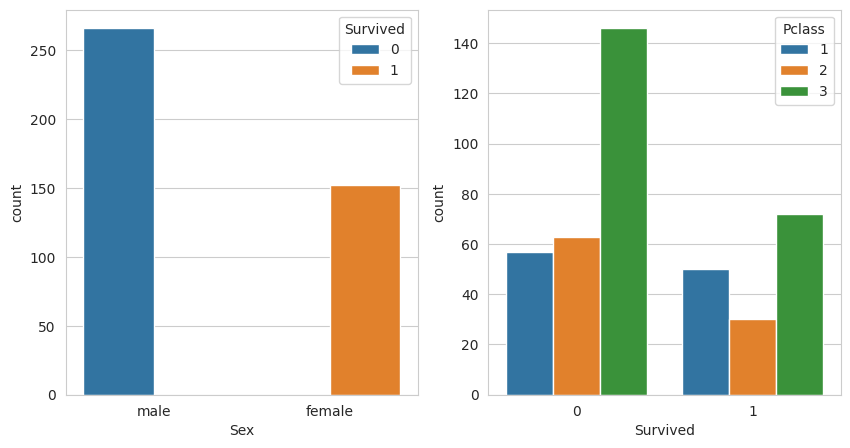

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=df['Sex'], hue=df['Survived'], ax=axes[0])
sns.countplot(x=df['Survived'], hue=df['Pclass'], ax=axes[1])
plt.show()

In [ ]:
X = df.drop(['Survived'], axis=1)

#Selecting Features
X = df[['Pclass','Sex']].copy()

#Selecting Target Variable
y = df['Survived']

In [ ]:
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(X_test)

     Pclass  Sex
286       3    1
282       3    0
371       1    0
177       1    1
185       2    1
..      ...  ...
345       3    0
173       3    1
139       3    1
166       1    1
386       3    1

[126 rows x 2 columns]


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test

286    0
282    1
371    1
177    0
185    0
      ..
345    1
173    0
139    0
166    0
386    0
Name: Survived, Length: 126, dtype: int64

In [ ]:
print(y_pred)

[0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]


In [ ]:
# Predicting the survival with: Pclass (1,2,3) and Sex (0 - 'Female'and 1 - 'Male')
# Also, 0 - 'Did not survive' and 1 - 'Survived'
pred_result = lr.predict([[2,1]])
if(pred_result==0):
  print("Did not survive")
else:
  print("Survived")

Did not survive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print("Accuracy score (in%):", acc*100)

clreport = classification_report(y_test, y_pred)
print("Classification Report:\n", clreport)

confmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confmatrix)

Accuracy score (in%): 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix:
 [[82  0]
 [ 0 44]]
